# Prediction of COVID-19 cases timeseries
- prediction is based on the model generated in 04_covid_qnpy_model.ipynb

Import packages:

In [1]:
from QNPy import PREDICTION as pr #Importing PREDICTION module from the package
from QNPy.PREDICTION import * #Importing all packages from PREDICTION module
from QNPy.PREDICTION import plot_function #The functions plot_function must be imported separately

In [2]:
#defining the device, it can be cpu of cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
DATA_PATH_TRAIN = "./dataset/train" #path to train folder
DATA_PATH_VAL = "./dataset/val" #path to val folder
DATA_PATH_TEST="./dataset/test" #path to test folder
OUTPUT_PATH = r"./output/predictions" #path where to save the plots and data

MODEL_PATH = "./output/cnp_model.pth" #path to saved model

In [4]:
pr.prepare_output_dir(OUTPUT_PATH) #clearing output dir, it can be skipped

In [5]:
model = pr.load_trained_model(MODEL_PATH, device) #loading the model

In [6]:
criterion, mseMetric= pr.get_criteria()#loading criterion and metrics from model

In [7]:
if __name__ == "__main__":
    folder_path = "./dataset/test"  # Change this to your dataset folder
    pr.remove_padded_values_and_filter(folder_path)
    folder_path = "./dataset/train"  # Change this to your dataset folder
    pr.remove_padded_values_and_filter(folder_path)
    folder_path = "./dataset/val"  # Change this to your dataset folder
    pr.remove_padded_values_and_filter(folder_path)

Deleted file with 'minus' or 'plus' in the name: 10001_cases_minus_split0.csv
Deleted file with 'minus' or 'plus' in the name: 1007_cases_minus_split18.csv
Removed padding in file: 1009_cases_original_split22.csv
Removed padding in file: 1015_cases_original_split31.csv
Deleted file with 'minus' or 'plus' in the name: 1017_cases_minus_split33.csv
Deleted file with 'minus' or 'plus' in the name: 1019_cases_plus_split38.csv
Deleted file with 'minus' or 'plus' in the name: 1023_cases_minus_split42.csv
Deleted file with 'minus' or 'plus' in the name: 1025_cases_minus_split45.csv
Deleted file with 'minus' or 'plus' in the name: 1027_cases_plus_split50.csv
Deleted file with 'minus' or 'plus' in the name: 1035_cases_minus_split60.csv
Deleted file with 'minus' or 'plus' in the name: 1045_cases_plus_split77.csv
Removed padding in file: 1047_cases_original_split79.csv
Deleted file with 'minus' or 'plus' in the name: 1047_cases_plus_split80.csv
Deleted file with 'minus' or 'plus' in the name: 1051

In [8]:
# Load the data:
testLoader=pr.load_test_data(DATA_PATH_TEST)#loading test data
trainLoader=pr.load_train_data(DATA_PATH_TRAIN)#loading trained data
valLoader=pr.load_val_data(DATA_PATH_VAL)#loading validation data

In [9]:
#prediction and plotting the test data
testMetrics=pr.plot_light_curves_from_test_set(model, testLoader, criterion, mseMetric, plot_function, device)

100%|██████████| 320/320 [00:48<00:00,  6.58it/s]


<Figure size 640x480 with 0 Axes>

In [10]:
saveTestMetric=pr.save_test_metrics('./output/predictions/', testMetrics)  #saving the test Metrics

In [11]:
#prediction and plotting the train data
trainMetrics=pr.plot_light_curves_from_train_set(trainLoader, model, criterion, mseMetric, plot_function, device)

100%|██████████| 2391/2391 [06:03<00:00,  6.58it/s]


<Figure size 640x480 with 0 Axes>

In [12]:
saveTrainMetric=pr.save_train_metrics('./output/predictions/', trainMetrics)#saving the train metrics

In [13]:
#prediction and plotting the val data
valMetric=pr.plot_light_curves_from_val_set(model, valLoader, criterion, mseMetric, plot_function, device)

 34%|███▍      | 101/299 [00:13<00:27,  7.23it/s]


<Figure size 640x480 with 0 Axes>

In [14]:
saveValMetrics=pr.save_val_metrics('./output/predictions/', valMetric)#saving the val metrics

### Results


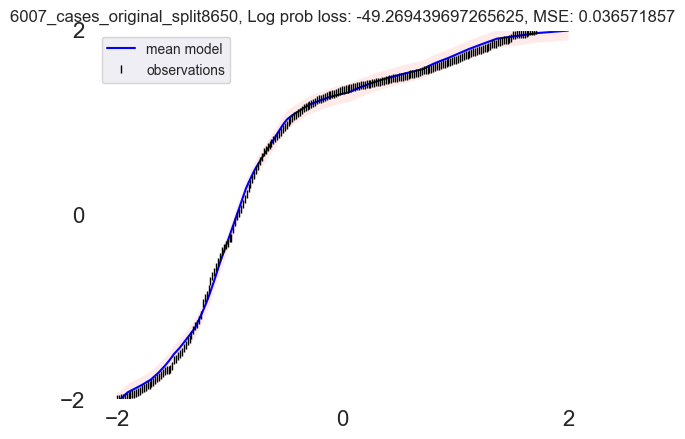

In [19]:
from IPython.display import Image, display

listOfImageNames = [r'/Users/marko/OneDrive/Documents/ADA master/Time Series Data Analysis/COVID_project/output/predictions/test/plots/6007_cases_original_split8650.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

The model seems to fit the data very well.